In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
salaries=pd.read_csv("Salaries.csv")
salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# About columns

# Salaries is Data Frame with 397 rows and 6 columns.
The 6 columns are : rank , discipline , yrs.since.phd , yrs.service , ex and salary . 
Among all these columns only yrs.since.phd and yrs.service are numerical input columns and salary is the target variable that is
also numerical type.

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Here we can see that there is no null values present in the dataset . 

In [5]:
salaries.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import LabelEncoder

In [7]:
le= LabelEncoder()

In [8]:
l=["rank","discipline","sex"]
for i in l:
    salaries[i] = le.fit_transform(salaries[i].astype(str))
salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [9]:
salaries.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


Here we can see that there are not much difference is there between mean values and median values and between 75% and max values.
the minimum values in "rank" , "discipline","yrs.service"and "sex" are 0 .

In [10]:
salaries.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Here we can see that not much skewness in present in the numerical columns . So we need not to be worried much about the skewnss.

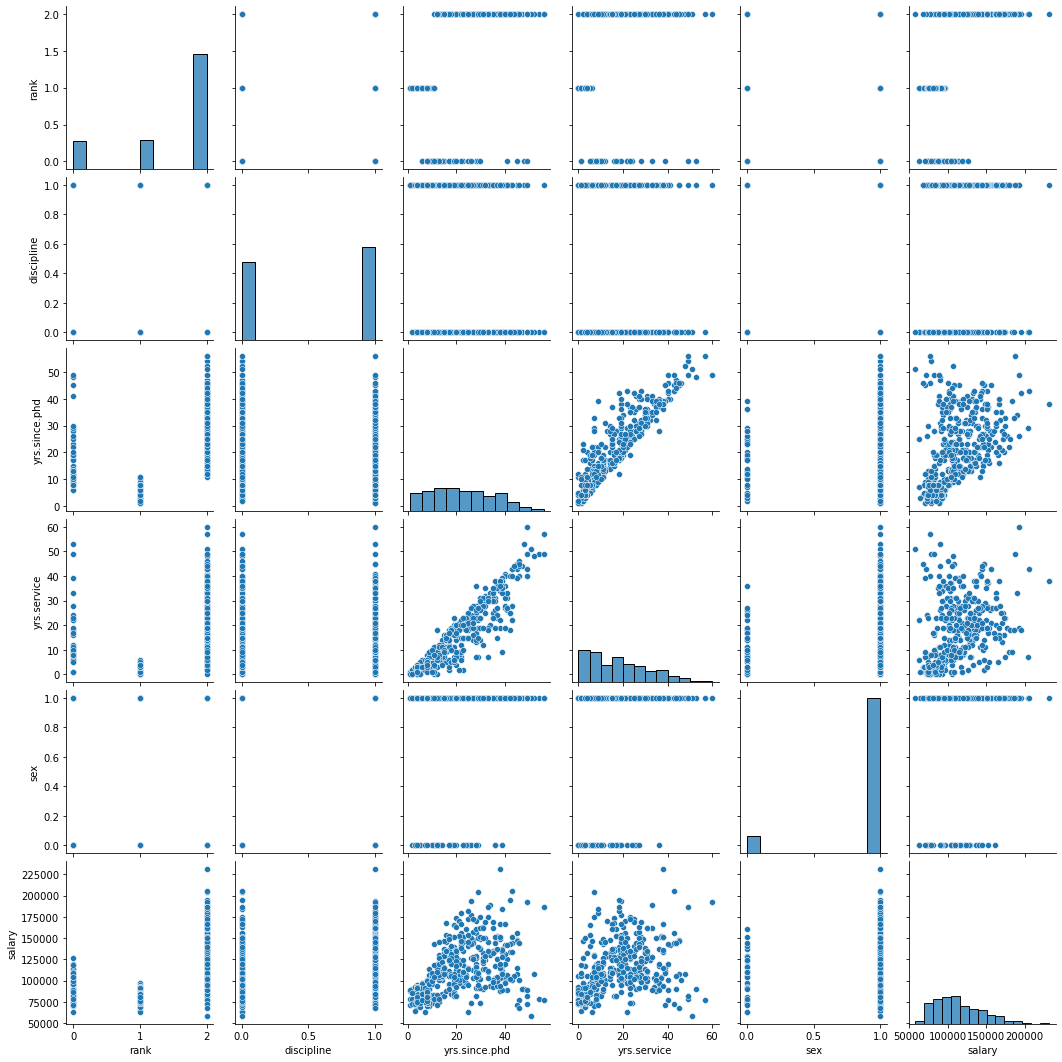

In [12]:
sns.pairplot(salaries)

Here we can see the different pair plots. We can see that 'yrs.since.phd' and 'yrs.service' these two columns are positively related with the target variable "salary ."

<AxesSubplot:xlabel='rank', ylabel='salary'>

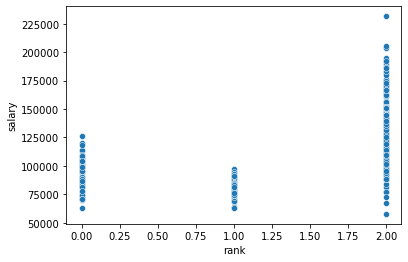

In [13]:
sns.scatterplot(x="rank",y="salary",data = salaries)

Here we can see the distribution of rank against salary. rank "0" is varied from salary (50000+ to 125000) , rank "1" is varied from salary ( 50000+ to 100000) where the rank "2" is varied from salary (50000 to 200000)

In [14]:
salaries["rank"].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='discipline', ylabel='salary'>

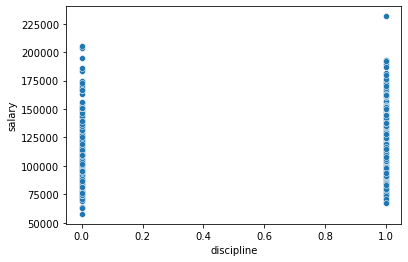

In [15]:
sns.scatterplot(x="discipline",y="salary",data = salaries)

Here we can see the distribution of "discipline" variable against salary , the target variable. discipline "0" is varied from salary (50000 to 200000) , discipline "1" is varied from salary ( 65000+ to 200000) .

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

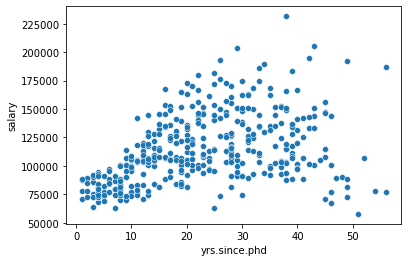

In [16]:
sns.scatterplot(x="yrs.since.phd",y="salary",data = salaries)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

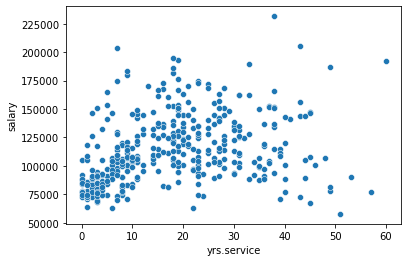

In [17]:
sns.scatterplot(x="yrs.service",y="salary",data = salaries)

<AxesSubplot:xlabel='sex', ylabel='salary'>

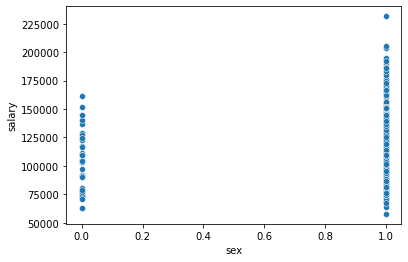

In [18]:
sns.scatterplot(x="sex",y="salary",data = salaries)

Here we can see the distribution of "sex" variable against salary , the target variable. sex "0" is varied from salary (50000 to 160000) , sex "1" is varied from salary ( 55000+ to 200000) .

In [19]:
salaries.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

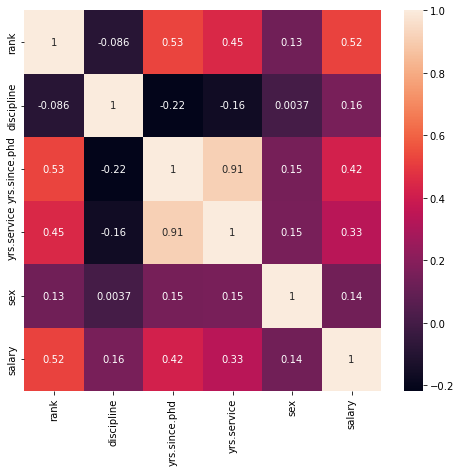

In [20]:
plt.figure(figsize=(8,7))
sns.heatmap(salaries.corr(),annot = True ,linecolor = "black")

Here we can see the different corelations . "yrs.since.phd" and "yrs.service" these two variables are highly co related with each other

rank                AxesSubplot(0.125,0.125;0.110714x0.755)
discipline       AxesSubplot(0.257857,0.125;0.110714x0.755)
yrs.since.phd    AxesSubplot(0.390714,0.125;0.110714x0.755)
yrs.service      AxesSubplot(0.523571,0.125;0.110714x0.755)
sex              AxesSubplot(0.656429,0.125;0.110714x0.755)
salary           AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

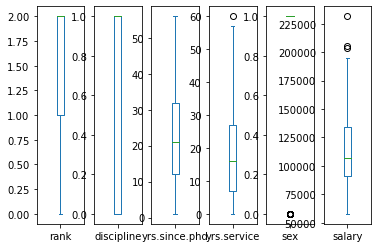

In [21]:

salaries.plot(kind="box",subplots = True, layout = (1,6))

Here we can see the different boxplots . Not much outliers are found in the variables.

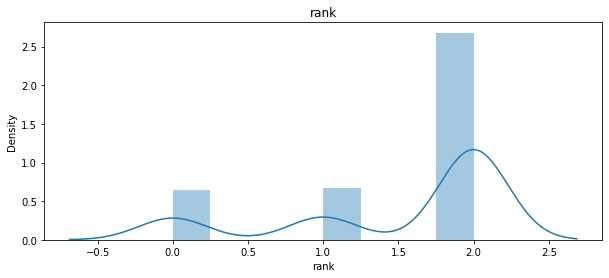

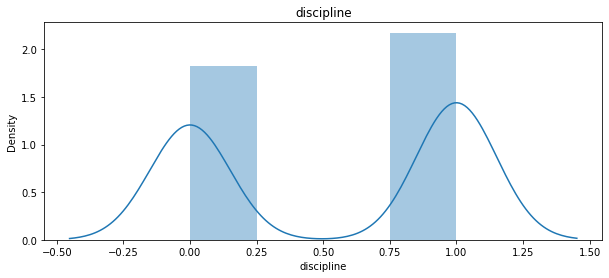

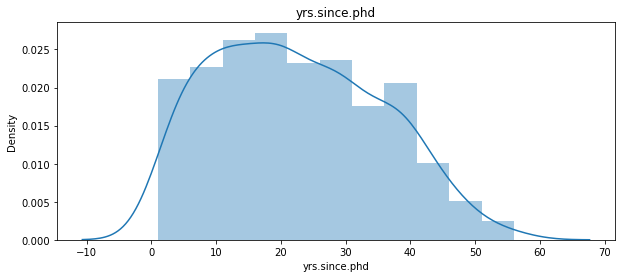

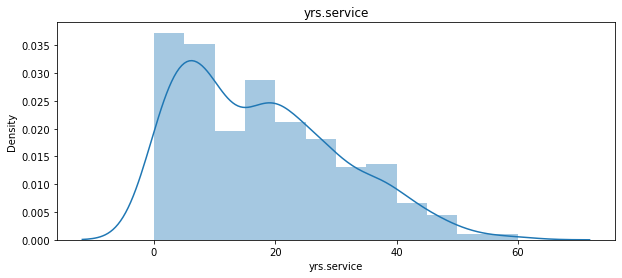

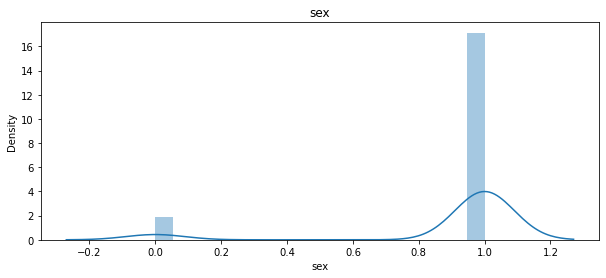

In [52]:
for col in x.columns:
    plt.figure(figsize=(10,4))
    plt.subplot()
    sns.distplot(x[col])
    plt.title(col)

Here we can see univariate analysis of different input variables . Some skewness is shown in the catagorical data  but as they are catagorical in nature so we need not to be much worried about this.

In [53]:
from sklearn.preprocessing import power_transform
xt=power_transform(x, method="yeo-johnson")
xt= pd.DataFrame(x)
xt.columns=x.columns
xt

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(xt)
xc=pd.DataFrame(xc)
xc.columns=xt.columns
xc

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.649257,0.915403,-0.257550,0.029669,0.330058
1,0.649257,0.915403,-0.179854,-0.124300,0.330058
2,-0.672564,0.915403,-1.422982,-1.125098,0.330058
3,0.649257,0.915403,1.762533,1.646343,0.330058
4,0.649257,0.915403,1.374055,1.800312,0.330058
...,...,...,...,...,...
392,0.649257,-1.092415,0.830187,0.953483,0.330058
393,0.649257,-1.092415,0.674796,0.106654,0.330058
394,0.649257,-1.092415,1.529446,0.568560,0.330058
395,0.649257,-1.092415,0.208623,-0.201284,0.330058


Here we have triede to scale the data in all the variables.

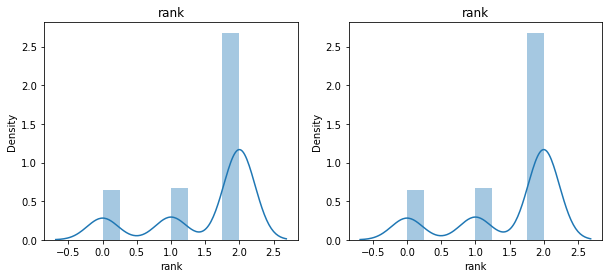

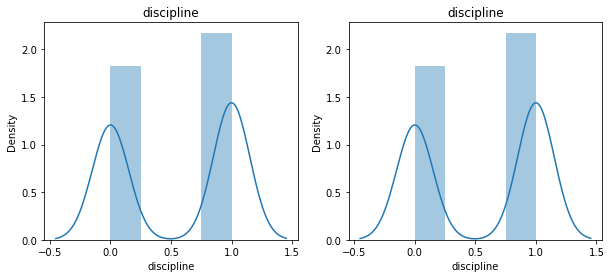

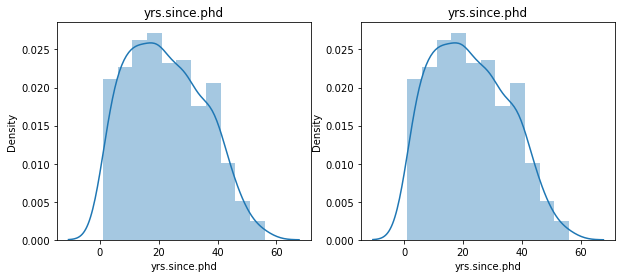

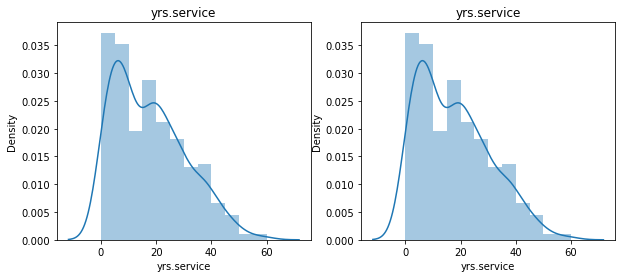

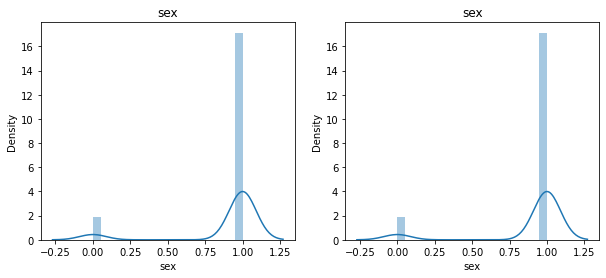

In [76]:
for col in xc.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(xt[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x[col])
    plt.title(col)
    

In [77]:
xt.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
dtype: float64

# data cleaning

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(salaries))
print(z)
z.shape

         rank  discipline  yrs.since.phd  yrs.service       sex    salary
0    0.649257    0.915403       0.257550     0.029669  0.330058  0.860919
1    0.649257    0.915403       0.179854     0.124300  0.330058  1.966672
2    0.672564    0.915403       1.422982     1.125098  0.330058  1.122495
3    0.649257    0.915403       1.762533     1.646343  0.330058  0.042760
4    0.649257    0.915403       1.374055     1.800312  0.330058  0.918768
..        ...         ...            ...          ...       ...       ...
392  0.649257    1.092415       0.830187     0.953483  0.330058  0.350418
393  0.649257    1.092415       0.674796     0.106654  0.330058  1.218396
394  0.649257    1.092415       1.529446     0.568560  0.330058  0.395640
395  0.649257    1.092415       0.208623     0.201284  0.330058  0.607502
396  0.672564    1.092415       1.112200     1.048113  0.330058  1.080017

[397 rows x 6 columns]


(397, 6)

In [23]:
threshold = 3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [24]:
salaries_new=salaries[(z<3).all(axis=1)]
salaries_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [25]:
data_loss_percentage=(397-357)/397*100
data_loss_percentage

10.075566750629724

Here we can see that if we try to remove outliers , we will lose more than 10% of the data . As maximum datas are catagorical in nature so we need not to remove the outliers.

In [26]:
salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [56]:
x=salaries.iloc[:,:-1]
x.shape
x.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1


In [57]:
y=salaries.iloc[:,-1]
y.shape

(397,)

In [58]:
import sklearn

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error

Here we are using Linear Regression model as the datas of target variable are contineous type .

In [61]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 11.0 KB


In [78]:

    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.33,random_state=42)
   
    
    

In [79]:
x_train.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
175,0.649257,0.915403,0.441710,0.568560,0.330058
119,-0.672564,-1.092415,-1.345286,-1.125098,-3.029767
374,0.649257,-1.092415,0.364014,0.106654,0.330058
326,0.649257,0.915403,0.053232,-0.201284,0.330058
141,-1.994386,-1.092415,-0.568332,-0.586207,0.330058


In [80]:
x_train.shape

(265, 5)

In [81]:
lm=LinearRegression()

In [82]:
lm.fit(x_train,y_train)

LinearRegression()

In [83]:
lm.score(x_train,y_train)

0.41911064491851935

Here we can see that model is not performing so well

In [68]:
pred=lm.predict(x_test)

In [69]:
from sklearn.metrics import r2_score

In [70]:
print(r2_score(y_test,pred))

0.23777745135260586


Here also we can see that model is not performing so well .

In [71]:
print("mean squared error is",mean_squared_error(y_test,pred))

mean squared error is 612016775.8602982


In [72]:
print("mean absolute error is",mean_absolute_error(y_test,pred))


mean absolute error is 18899.39641591266


In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,xc,y,cv=5)
score

array([0.1916776 , 0.48851746, 0.37534872, 0.16207363, 0.26087903])

In [87]:
print(score.mean())

0.29569928663871725


Here we can see that not much deifference in between  r2 score and cross val score . so we should try another model here.

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtr = DecisionTreeRegressor()
svr= SVR()
knr=KNeighborsRegressor()

In [89]:
l=[dtr,svr,knr]
for i in l:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i.score(x_train,y_train))

0.9268987686928527
-0.03316327517183715
0.6223436419277175


Here we can see that Decision Tree Regression model is giving a good result . so we should take this model for prediction.

# conclsion

In [92]:
a= np.array(y_test)
dtrpred=np.array(dtr.predict(x_test))
df_comp=pd.DataFrame({"original":a,"predicted":dtrpred})
df_comp

,original,predicted
0,105000,93000.0
1,107100,113068.0
2,63100,74000.0
3,90215,100522.0
4,100131,151350.0
...,...,...
127,108100,104350.0
128,146800,120806.0
129,118971,119250.0
130,163200,104800.0


Here we can compare the original result with p[redicted result by using Decision Tree Regression model.